# Visualise LJ Oscillator with with forward Euler, symplectic Euler, RK4 and Verlet integrators

In [ ]:
import sys
sys.path.append('..')

import numpy as np
from matplotlib import pyplot as plt
from Code.dynamical_system import LennardJonesOscillator
from Code.time_integrator import *

##Define parameters for the LJ Oscillator

In [ ]:
np.random.seed(2512517)
mass = 1.2
#k_spring = 0.9
dt = 0.0001
T_final = 100.0
lennardjones_oscillator = LennardJonesOscillator(mass)
forward_euler_integrator = ForwardEulerIntegrator(lennardjones_oscillator,dt)
verlet_integrator = VerletIntegrator(lennardjones_oscillator,dt)
symplectic_euler_integrator = SymplecticEulerIntegrator(lennardjones_oscillator,dt)
rk4_integrator = RK4Integrator(lennardjones_oscillator,dt)
x = np.zeros(1)
v = np.zeros(1)
x[0] = 2.0
v[0] = 0.0

##Integrate using the given numerical methods

In [ ]:
n_step = int(T_final/dt)
energies = np.zeros((4,n_step))
x_phase = np.zeros((4,n_step))
v_phase = np.zeros((4,n_step))

for j, integrator in enumerate((forward_euler_integrator,verlet_integrator,symplectic_euler_integrator,rk4_integrator)):
    integrator.set_state(x,v)
    for k in range(n_step):
        energies[j,k] = lennardjones_oscillator.energy(integrator.x,integrator.v)
        x_phase[j,k] = integrator.x[0]
        v_phase[j,k] = integrator.v[0]
        integrator.integrate(1)    

## Plot phase space diagram

Text(0.5, 0, 'position $x$')

<Figure size 432x288 with 0 Axes>

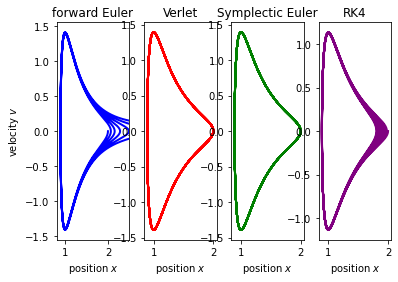

In [ ]:
plt.clf()
figs, axs = plt.subplots(1,4)
X = dt*np.arange(n_step)
axs[0].plot(x_phase[0,:],v_phase[0,:],linewidth=2,color='blue')
axs[0].set_title('forward Euler')
axs[0].set_xlabel('position $x$')
axs[0].set_ylabel('velocity $v$')
axs[0].set_xlim(0.8,2.5)
axs[1].plot(x_phase[1,:],v_phase[1,:],linewidth=2,color='red')
axs[1].set_title('Verlet')
axs[1].set_xlabel('position $x$')
axs[2].plot(x_phase[2,:],v_phase[2,:],linewidth=2,color='green')
axs[2].set_title('Symplectic Euler')
axs[2].set_xlabel('position $x$')
axs[3].plot(x_phase[3,:],v_phase[3,:],linewidth=2,color='purple')
axs[3].set_title('RK4')
axs[3].set_xlabel('position $x$')

## Plot energy drift

<Figure size 432x288 with 0 Axes>

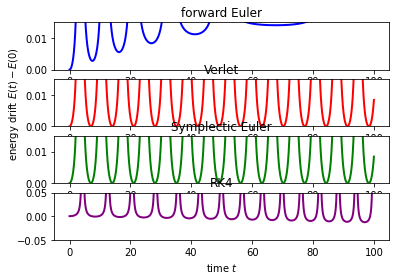

In [ ]:
plt.clf()
figs, axs = plt.subplots(4,1)
X = dt*np.arange(n_step)
axs[0].plot(X,energies[0,:]-energies[0,0],linewidth=2,color='blue')
#axs[0].set_ylabel('energy drift $E(t)-E(0)$')
axs[0].set_title('forward Euler')
axs[0].set_ylim(0,0.015)
axs[1].plot(X,energies[1,:]-energies[1,0],linewidth=2,color='red')
axs[1].set_title('Verlet')
axs[1].set_xlabel('time $t$')
axs[1].set_ylabel('energy drift $E(t)-E(0)$')
axs[1].set_ylim(0,0.015)
axs[2].plot(X,energies[2,:]-energies[2,0],linewidth=2,color='green')
axs[2].set_title('Symplectic Euler')
axs[2].set_xlabel('time $t$')
#axs[2].set_ylabel('energy drift $E(t)-E(0)$')
axs[2].set_ylim(0,0.015)
axs[3].plot(X,energies[3,:]-energies[3,0],linewidth=2,color='purple')
axs[3].set_title('RK4')
axs[3].set_xlabel('time $t$')
axs[3].set_ylim(-0.05,0.05)
plt.savefig('energies.pdf',bbox_inches='tight')